In [47]:
### DO NOT MODIFY THIS CODE. JUST RUN IT.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# creating the dataset
X, y = make_blobs(n_samples=70, centers=[(0, 0), (3, 4), (2, -5), (6, 3), (8, -1), (6, -6)], n_features=2, cluster_std=1.5, random_state=42)
y[y == 2] = 1
y[y == 3] = 0
y[y == 4] = 1
y[y == 5] = 0

# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [48]:
import matplotlib.pyplot as plt

 Plot the dataset in a 2D plot:  x1  vs.  x0 .

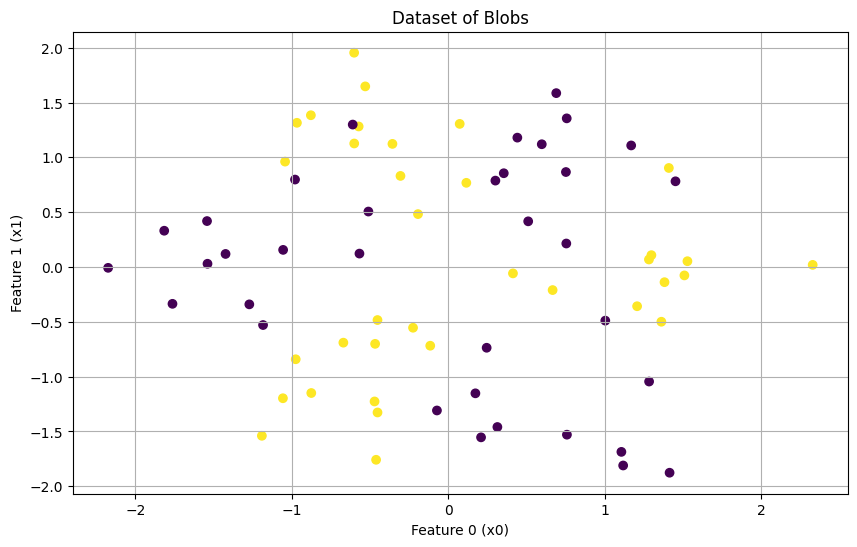

In [49]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Dataset of Blobs')
plt.xlabel('Feature 0 (x0)')
plt.ylabel('Feature 1 (x1)')
plt.grid()
plt.show()

Use 10-fold cross-validation to compute macro-averaged F1-score and Accuracy measure evaluating 32 models that you get by creating polynomials from degree 1 to 4 and regularizing each of them by the following C values: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] (don't worry if you get a couple of warning messages about convergence). Print all 32 F1-scores and Accuracies on screen. Store all 32 F1-scores in a 2D array.

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import numpy as np

In [51]:
# Definir los grados y valores de C
degrees = [1, 2, 3, 4]
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Inicializar matrices 
f1_scores = np.zeros((len(degrees), len(C_values)))
accuracies = np.zeros((len(degrees), len(C_values)))


for i, degree in enumerate(degrees):
    # Transformar los datos para crear características polinómicas
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    for j, C in enumerate(C_values):
        # Modelo
        model = LogisticRegression(C=C, solver='liblinear', max_iter=10000)
        
        # F1-score y Accuracy 
        f1 = cross_val_score(model, X_poly, y, cv=10, scoring=make_scorer(f1_score, average='macro')).mean()
        accuracy = cross_val_score(model, X_poly, y, cv=10, scoring='accuracy').mean()
        
        # Resultados
        f1_scores[i, j] = f1
        accuracies[i, j] = accuracy
        
        print(f"Degree: {degree}, C: {C:.4f} => F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

# Mostrar la matriz de F1-scores
print("\nF1-scores:")
print(f1_scores)

Degree: 1, C: 0.0001 => F1 Score: 0.2635, Accuracy: 0.2857
Degree: 1, C: 0.0010 => F1 Score: 0.2635, Accuracy: 0.2857
Degree: 1, C: 0.0100 => F1 Score: 0.2635, Accuracy: 0.2857
Degree: 1, C: 0.1000 => F1 Score: 0.2772, Accuracy: 0.3000
Degree: 1, C: 1.0000 => F1 Score: 0.3044, Accuracy: 0.3429
Degree: 1, C: 10.0000 => F1 Score: 0.3044, Accuracy: 0.3429
Degree: 1, C: 100.0000 => F1 Score: 0.3044, Accuracy: 0.3429
Degree: 1, C: 1000.0000 => F1 Score: 0.3044, Accuracy: 0.3429
Degree: 2, C: 0.0001 => F1 Score: 0.2952, Accuracy: 0.3571
Degree: 2, C: 0.0010 => F1 Score: 0.2874, Accuracy: 0.3429
Degree: 2, C: 0.0100 => F1 Score: 0.3393, Accuracy: 0.3714
Degree: 2, C: 0.1000 => F1 Score: 0.3845, Accuracy: 0.4000
Degree: 2, C: 1.0000 => F1 Score: 0.3724, Accuracy: 0.3857
Degree: 2, C: 10.0000 => F1 Score: 0.3840, Accuracy: 0.4000
Degree: 2, C: 100.0000 => F1 Score: 0.4001, Accuracy: 0.4143
Degree: 2, C: 1000.0000 => F1 Score: 0.4001, Accuracy: 0.4143
Degree: 3, C: 0.0001 => F1 Score: 0.6252, Ac

Use the array from Step 2 to plot a single diagram showing dependence of F1 on C for all four polynomial degrees. In the diagram plot four curves (one for each polynomial degree). The horizontal axis (C) should be log-scaled. If you know how to plot a heatmap, you may also in addition plot a heatmap with Degree vs. C axes.

In [52]:
# Definir los grados y valores de C
degrees = [1, 2, 3, 4]
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Inicializar matrices 
f1_scores = np.zeros((len(degrees), len(C_values)))
accuracies = np.zeros((len(degrees), len(C_values)))


for i, degree in enumerate(degrees):
    # Transformar los datos para crear características polinómicas
    poly = PolynomialFeatures(degree=degree)


    for j, C in enumerate(C_values):
        # Modelo
        model = LogisticRegression(C=C, solver='liblinear', max_iter=10000)
        
        # F1-score y Accuracy 
        f1 = cross_val_score(model, X_poly, y, cv=10, scoring=make_scorer(f1_score, average='macro')).mean()
        accuracy = cross_val_score(model, X_poly, y, cv=10, scoring='accuracy').mean()
        
        # Resultados
        f1_scores[i, j] = f1
        accuracies[i, j] = accuracy
        
        print(f"Degree: {degree}, C: {C:.4f} => F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

# Mostrar la matriz de F1-scores
print("\nF1-scores:")
print(f1_scores)

Degree: 1, C: 0.0001 => F1 Score: 0.5804, Accuracy: 0.6000
Degree: 1, C: 0.0010 => F1 Score: 0.5571, Accuracy: 0.5857
Degree: 1, C: 0.0100 => F1 Score: 0.6289, Accuracy: 0.6571
Degree: 1, C: 0.1000 => F1 Score: 0.8488, Accuracy: 0.8714
Degree: 1, C: 1.0000 => F1 Score: 0.7945, Accuracy: 0.8143
Degree: 1, C: 10.0000 => F1 Score: 0.8268, Accuracy: 0.8571
Degree: 1, C: 100.0000 => F1 Score: 0.8144, Accuracy: 0.8286
Degree: 1, C: 1000.0000 => F1 Score: 0.8281, Accuracy: 0.8429
Degree: 2, C: 0.0001 => F1 Score: 0.5804, Accuracy: 0.6000
Degree: 2, C: 0.0010 => F1 Score: 0.5571, Accuracy: 0.5857
Degree: 2, C: 0.0100 => F1 Score: 0.6289, Accuracy: 0.6571
Degree: 2, C: 0.1000 => F1 Score: 0.8488, Accuracy: 0.8714
Degree: 2, C: 1.0000 => F1 Score: 0.7945, Accuracy: 0.8143
Degree: 2, C: 10.0000 => F1 Score: 0.8268, Accuracy: 0.8571
Degree: 2, C: 100.0000 => F1 Score: 0.8144, Accuracy: 0.8286
Degree: 2, C: 1000.0000 => F1 Score: 0.8281, Accuracy: 0.8429
Degree: 3, C: 0.0001 => F1 Score: 0.5804, Ac

In [53]:
import seaborn as sns

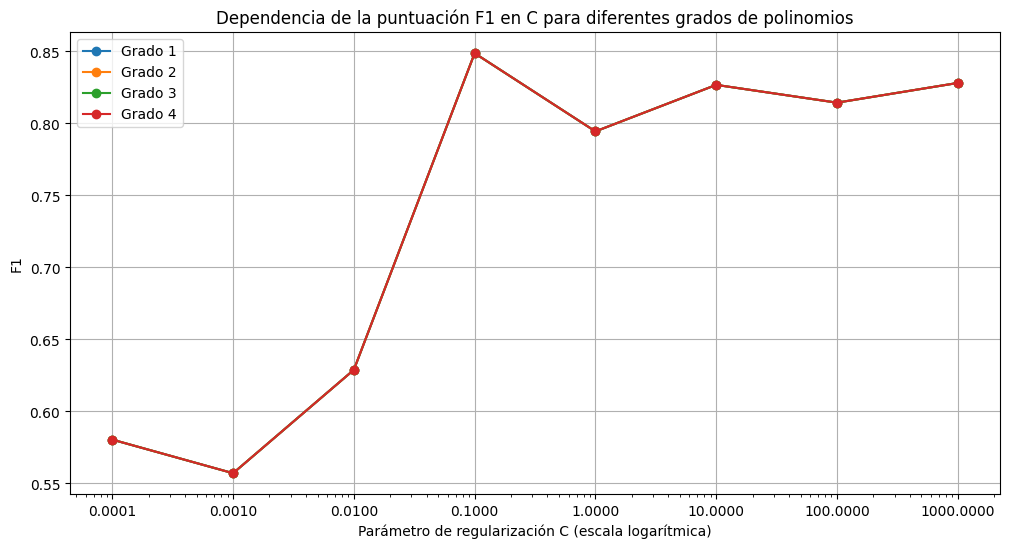

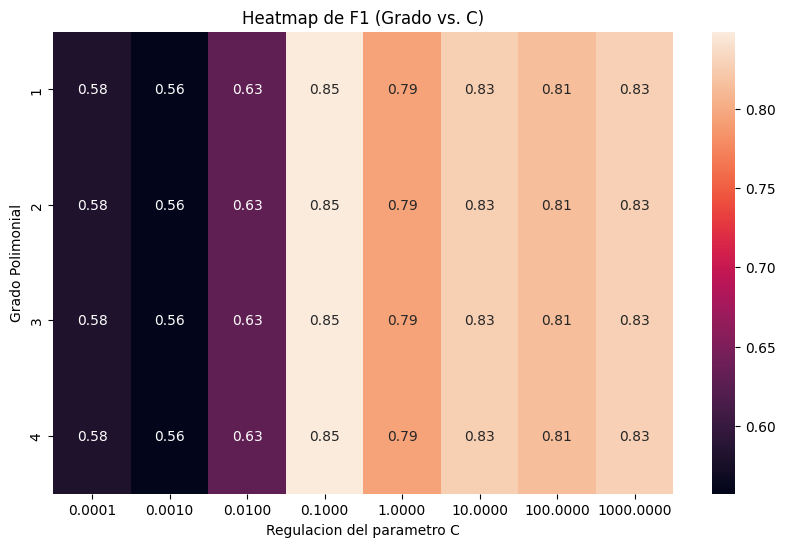

In [54]:
plt.figure(figsize=(12, 6))

# F1-scores para cada grado
for i, degree in enumerate(degrees):
    plt.plot(C_values, f1_scores[i], label=f'Grado {degree}', marker='o')

plt.xscale('log')  # Escala logarítmica en el eje X
plt.title('Dependencia de la puntuación F1 en C para diferentes grados de polinomios')
plt.xlabel('Parámetro de regularización C (escala logarítmica)')
plt.ylabel('F1')
plt.xticks(C_values, labels=[f'{c:.4f}' for c in C_values])  
plt.legend()
plt.grid(True)
plt.show()

# Heatmap de F1-scores
plt.figure(figsize=(10, 6))
sns.heatmap(f1_scores, annot=True, fmt=".2f", xticklabels=[f'{c:.4f}' for c in C_values], yticklabels=degrees)
plt.title('Heatmap de F1 (Grado vs. C)')
plt.xlabel('Regulacion del parametro C')
plt.ylabel('Grado Polimonial')
plt.show()

Plot four diagrams, in each showing the data points as well as the decision thresholds for one of the four polynomial degrees when its best C value is used.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Crear una pipeline que incluya la transformación polinómica y la regresión logística
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('log_reg', LogisticRegression(solver='lbfgs'))
])

# Definir los parámetros para la búsqueda
param_grid = {
    'poly_features__degree': degrees,
    'log_reg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X, y)

# Obtener los mejores parámetros
best_parameters = grid_search.best_params_
best_C_values = [best_parameters['log_reg__C'] if best_parameters['poly_features__degree'] == degree else 1 for degree in degrees]

print("Mejores valores de C para cada grado polinómico:", best_C_values)

Mejores valores de C para cada grado polinómico: [1, 1, 0.1, 1]


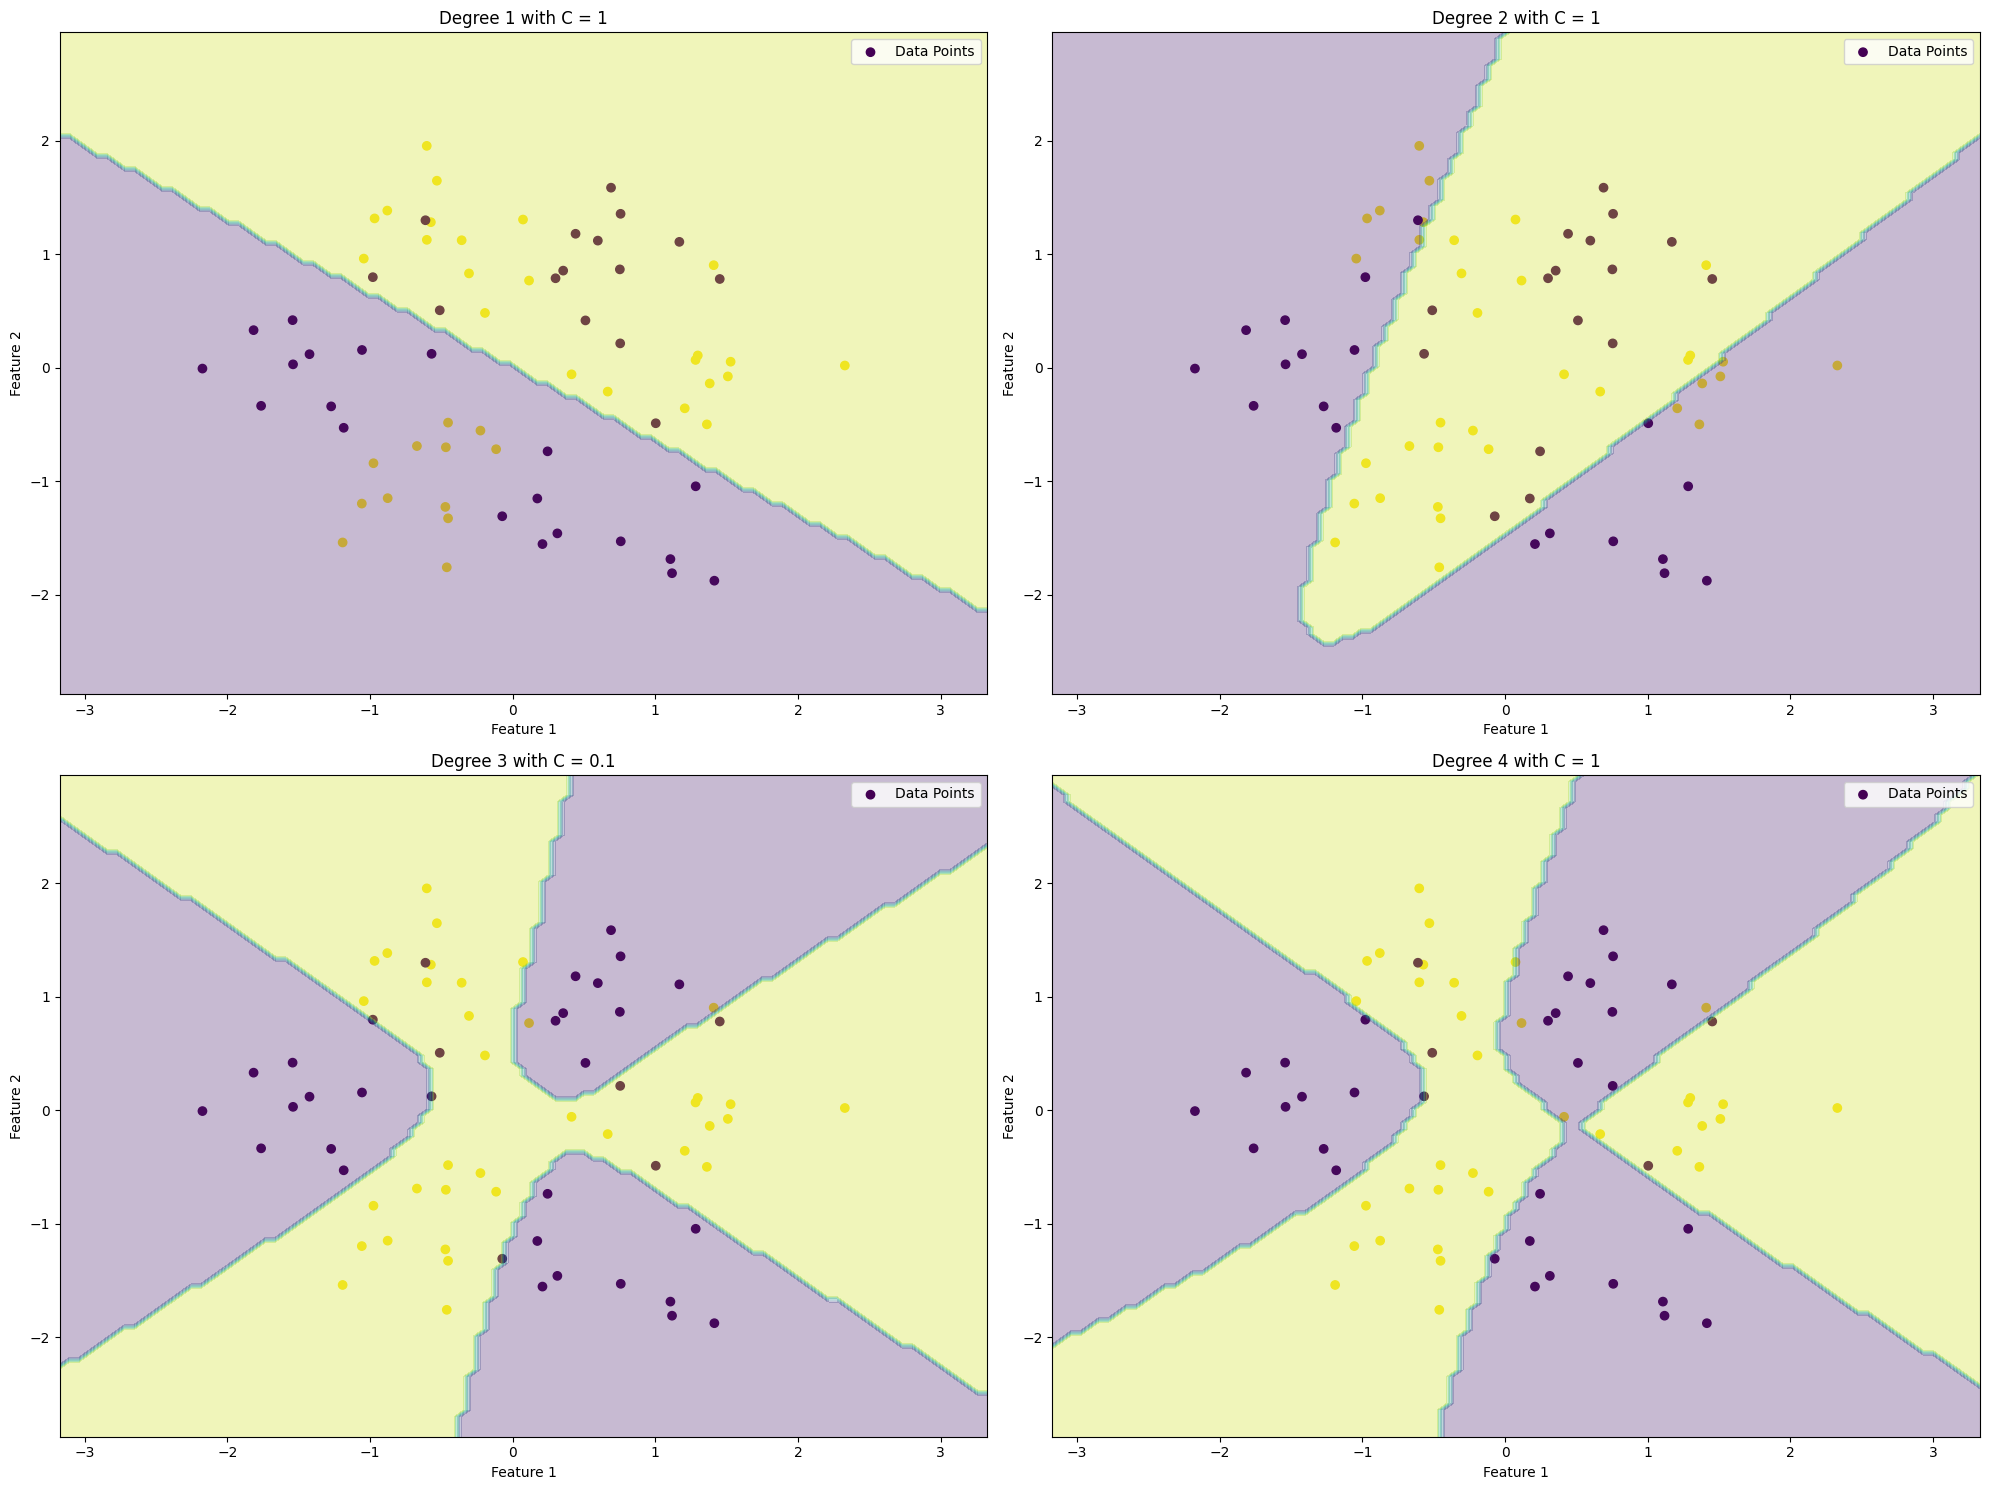

In [56]:

# Crear los gráficos para cada grado polinómico
plt.figure(figsize=(20, 15))

for i, degree in enumerate(degrees):
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Crear y entrenar el modelo
    model = LogisticRegression(C=best_C_values[i], solver='liblinear')
    model.fit(X_poly, y)

    # Crear un gráfico
    plt.subplot(2, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, label='Data Points')

    # Definir el rango para las características
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predecir las probabilidades y la frontera de decisión
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Trazar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.title(f'Degree {degree} with C = {best_C_values[i]}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

plt.tight_layout()
plt.show()